In [2]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt

import seaborn as sns
import scipy.special as sps
from scipy import *
import warnings
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 7.0)
warnings.filterwarnings("ignore")

In [3]:
transactions = pd.read_csv('C:/Users/ayrat/Downloads/transactions.csv', sep=';', parse_dates = ['tran_dttm'], comment='#')

In [4]:
transactions

,client_id,tran_dttm,tran_amt,merchant_category,brand,credit_tran_amt,deposit_tran_amt,is_action,is_nfc_pay,term,brand_rk
0,1191,2018-10-09 16:24:27,295.00,Продукты и товары повседневного спроса,Славянский,295.00,0.0,-1.0,0.0,1.0,12453.0
1,1191,2018-10-30 17:42:03,211.00,Продукты и товары повседневного спроса,Славянский,211.00,0.0,-1.0,0.0,1.0,12453.0
2,1191,2018-11-01 10:42:53,210.00,Продукты и товары повседневного спроса,Славянский,210.00,0.0,-1.0,0.0,1.0,12453.0
3,1191,2018-11-14 08:17:04,295.00,Продукты и товары повседневного спроса,Славянский,295.00,0.0,-1.0,0.0,1.0,12453.0
4,1191,2018-11-23 08:23:18,210.00,Продукты и товары повседневного спроса,Славянский,210.00,0.0,-1.0,0.0,1.0,12453.0
...,...,...,...,...,...,...,...,...,...,...,...
705767,74838128,2018-12-23 12:17:26,488.77,Продукты,ПЯТЕРОЧКА,488.77,0.0,-1.0,0.0,1.0,11326.0
705768,74838128,2018-12-27 10:49:28,829.68,Продукты,ПЯТЕРОЧКА,829.68,0.0,-1.0,0.0,1.0,11326.0
705769,74838128,2019-01-25 07:58:57,382.98,Продукты,Пятерочка,382.98,0.0,-1.0,0.0,1.0,11326.0
705770,74838128,2019-02-01 19:16:07,133.96,Продукты,ПЯТЕРОЧКА,133.96,0.0,-1.0,0.0,1.0,11326.0


In [5]:
client = pd.read_excel('C:/Users/ayrat/Downloads/clients.xlsx')

In [6]:
client.head()

,client_id,credit_limit_initial,credit_limit,add_product,mp_first_login,mp_last_login,tp_num,cl_age,education_id,gender_id,marital_status_id,employment_status_cd,city_population_category,app_channel
0,16036,15000.0,15000.0,Халва,2018-12-05 00:00:00.000,2019-02-07 00:00:00.000,NaN,45,3,2,2,PNW,0 – 100 тыс,Walk In Sales
1,72530,30000.0,30000.0,Халва + ДК,2018-12-01 00:00:00.000,2018-12-01 00:00:00.000,NaN,65,3,1,4,PNS,300 – 700 тыс,Call Center
2,81134,15000.0,15000.0,Халва,NaN,NaN,NaN,59,3,1,2,PNS,0 – 100 тыс,Walk In Sales
3,82643,15000.0,150000.0,Халва,2018-05-18 00:00:00.000,2019-03-11 00:00:00.000,1.0,37,6,1,1,EME,>700 тыс,Walk In Sales
4,103623,15000.0,30000.0,Халва,2018-10-28 00:00:00.000,2019-02-10 00:00:00.000,NaN,65,2,2,2,PNS,100 – 300 тыс,УРМ


In [7]:
transactions_1 = transactions.merge(client, left_on='client_id', right_on='client_id')

In [8]:
transactions_1

,client_id,tran_dttm,tran_amt,merchant_category,brand,credit_tran_amt,deposit_tran_amt,is_action,is_nfc_pay,term,...,mp_first_login,mp_last_login,tp_num,cl_age,education_id,gender_id,marital_status_id,employment_status_cd,city_population_category,app_channel
0,1191,2018-10-09 16:24:27,295.00,Продукты и товары повседневного спроса,Славянский,295.0,0.00,-1.0,0.0,1.0,...,2018-05-30 00:00:00.000,2019-03-03 00:00:00.000,NaN,48,3,2,5,EME,0 – 100 тыс,Call Center
1,1191,2018-10-30 17:42:03,211.00,Продукты и товары повседневного спроса,Славянский,211.0,0.00,-1.0,0.0,1.0,...,2018-05-30 00:00:00.000,2019-03-03 00:00:00.000,NaN,48,3,2,5,EME,0 – 100 тыс,Call Center
2,1191,2018-11-01 10:42:53,210.00,Продукты и товары повседневного спроса,Славянский,210.0,0.00,-1.0,0.0,1.0,...,2018-05-30 00:00:00.000,2019-03-03 00:00:00.000,NaN,48,3,2,5,EME,0 – 100 тыс,Call Center
3,1191,2018-11-14 08:17:04,295.00,Продукты и товары повседневного спроса,Славянский,295.0,0.00,-1.0,0.0,1.0,...,2018-05-30 00:00:00.000,2019-03-03 00:00:00.000,NaN,48,3,2,5,EME,0 – 100 тыс,Call Center
4,1191,2018-11-23 08:23:18,210.00,Продукты и товары повседневного спроса,Славянский,210.0,0.00,-1.0,0.0,1.0,...,2018-05-30 00:00:00.000,2019-03-03 00:00:00.000,NaN,48,3,2,5,EME,0 – 100 тыс,Call Center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705767,73001832,2019-01-12 17:01:39,29990.00,Электроника,М.видео,28665.2,1324.80,-1.0,0.0,4.0,...,2018-05-16 00:00:00.000,2019-03-09 00:00:00.000,NaN,27,-1,2,1,OTH,>700 тыс,УРМ
705768,73379403,2018-11-06 13:07:37,2900.00,Одежда и обувь,Cross,2900.0,0.00,-1.0,0.0,4.0,...,NaN,NaN,NaN,49,-1,1,2,EME,300 – 700 тыс,Walk In Sales
705769,73379403,2018-11-07 04:51:37,4790.00,Одежда и обувь,Francesco Donni,4790.0,0.00,-1.0,0.0,4.0,...,NaN,NaN,NaN,49,-1,1,2,EME,300 – 700 тыс,Walk In Sales
705770,73424691,2019-01-22 08:09:09,1190.00,Красота и здоровье,Соната,0.0,1190.00,-1.0,0.0,0.0,...,2018-05-29 00:00:00.000,2019-03-10 00:00:00.000,NaN,39,6,1,1,EME,100 – 300 тыс,Internet Sales


In [9]:
transactions_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705772 entries, 0 to 705771
Data columns (total 24 columns):
client_id                   705772 non-null int64
tran_dttm                   705772 non-null datetime64[ns]
tran_amt                    705772 non-null float64
merchant_category           705406 non-null object
brand                       705767 non-null object
credit_tran_amt             705767 non-null float64
deposit_tran_amt            705767 non-null float64
is_action                   705767 non-null float64
is_nfc_pay                  705767 non-null float64
term                        705767 non-null float64
brand_rk                    705767 non-null float64
credit_limit_initial        705772 non-null float64
credit_limit                705772 non-null float64
add_product                 705772 non-null object
mp_first_login              656834 non-null object
mp_last_login               656834 non-null object
tp_num                      88489 non-null float64
cl_age

In [10]:
transactions_1['merchant_category'].unique()

array(['Продукты и товары повседневного спроса', 'Продукты', 'Прочее',
       'Аптеки', 'Мебель и товары для дома', 'Спорт', 'Одежда и обувь',
       'Красота и здоровье', 'Электроника', 'Авто и запчасти', 'Заправки',
       'Косметика и парфюмерия', 'товары повседневного спроса',
       'Ювелирные изделия', nan, 'Подарки и развлечения', 'Зоотовары',
       'Детские товары', 'Кафе и рестораны', 'Товары для ремонта',
       'Интернет-магазины', 'Досуг и развлечения', 'Путешествия',
       'Такси и грузоперевозки', 'Страхование'], dtype=object)

In [11]:
np.sort(transactions_1['cl_age'].unique())

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75], dtype=int64)

In [13]:
transactions_1['tran_dttm'].max()

Timestamp('2019-03-11 22:54:41')

In [17]:
transactions_1['tran_dttm'].min()

Timestamp('2018-10-01 00:20:51')

In [16]:
transactions_1['tran_dttm'].max() - transactions_1['tran_dttm'].min()

Timedelta('161 days 22:33:50')

In [ ]:
# Ниже пять столбчатых диаграмм, данные сгруппированы по категории товаров в зависимости от демографических и географических характеристик клиентов. 

In [139]:
plt.rcParams.update({'font.size': 20})

In [154]:
Gender_id = pd.DataFrame()

for name, group in transactions_1.groupby(['gender_id']):
    df_1 = group.groupby('merchant_category').count()
    Gender_id[name] = df_1['client_id']
    
Gender_id

,-1,1,2
merchant_category,,,
Авто и запчасти,38,1945,2526
Аптеки,37,9423,4650
Детские товары,15,2796,1303
Заправки,240,24520,36556
Интернет-магазины,21,3491,3249
Кафе и рестораны,30,5770,4614
Косметика и парфюмерия,9,6296,1656
Красота и здоровье,35,3067,1160
Мебель и товары для дома,6,2520,1097


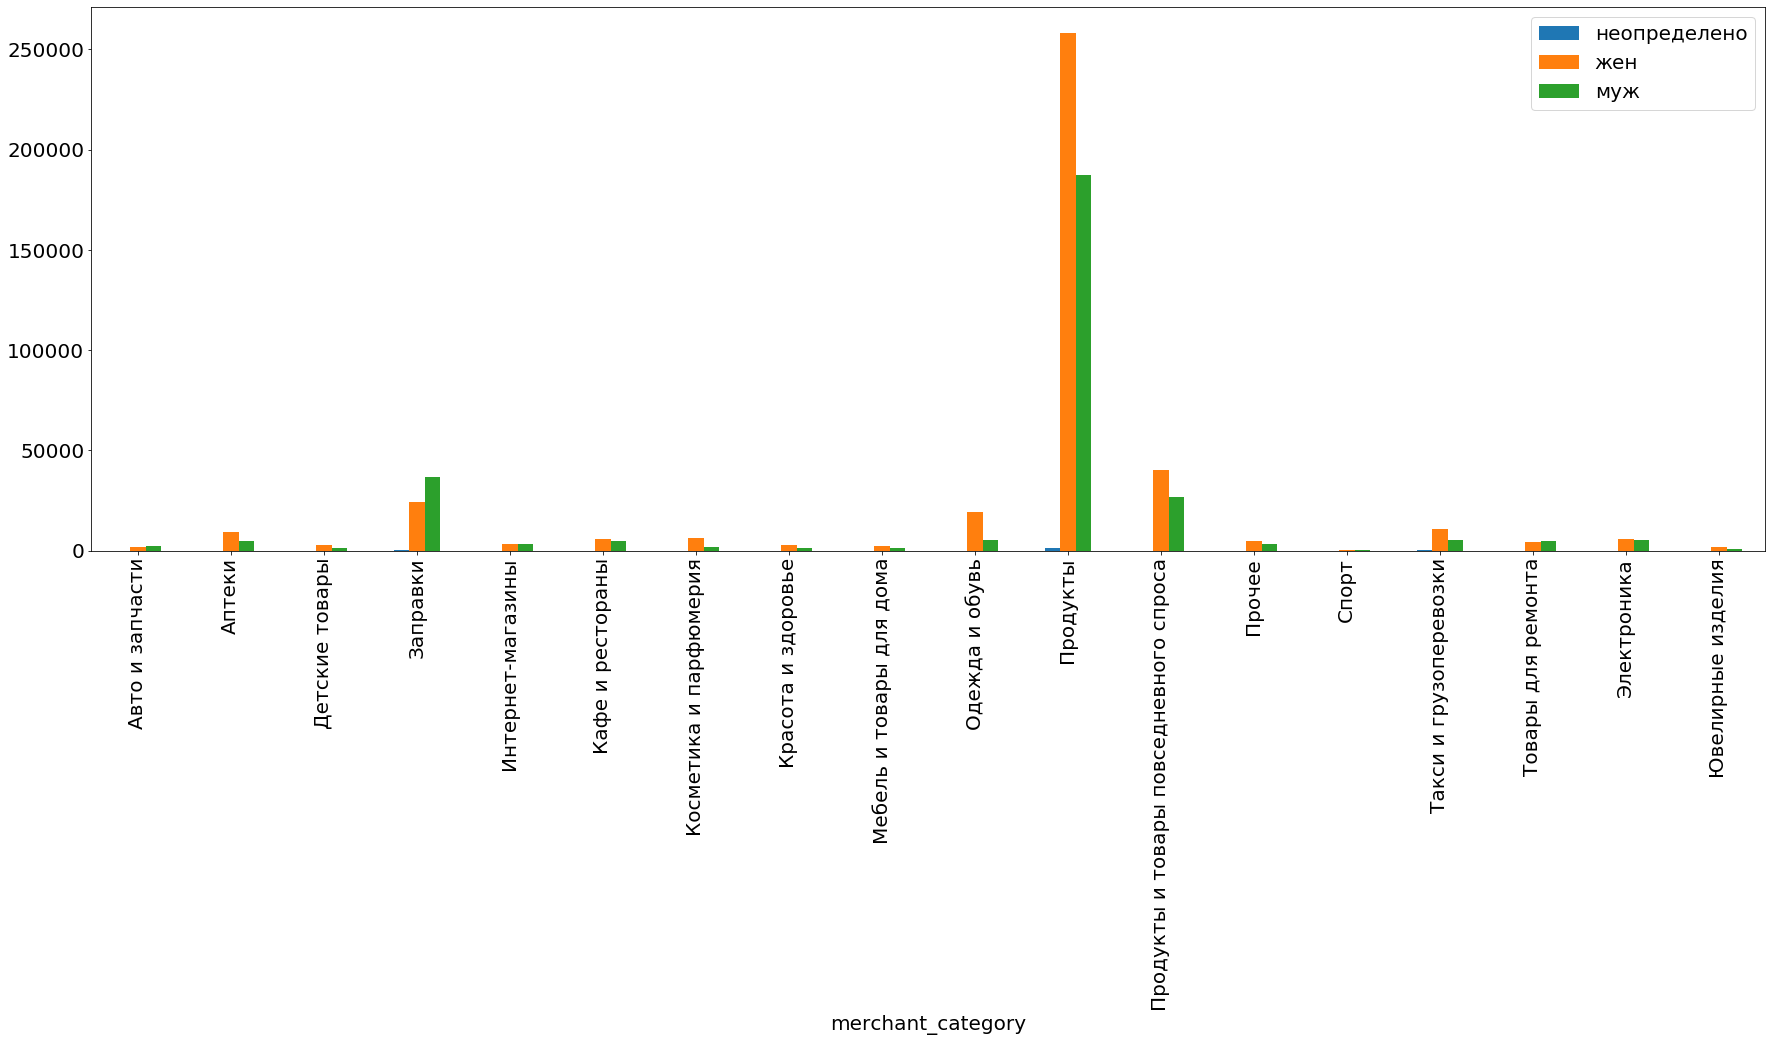

In [155]:
Gender_id.plot.bar(figsize=(30, 10))
plt.legend(['неопределено', 'жен', 'муж'])

In [146]:
Marital_status_id = pd.DataFrame()

for name, group in transactions_1.groupby(['marital_status_id']):
    df_2 = group.groupby('merchant_category').count()
    Marital_status_id[name] = df_2['client_id']

Marital_status_id

,-1,1,2,3,4,5
merchant_category,,,,,,
Авто и запчасти,189,1315,2445,353,57.0,150
Аптеки,826,2954,7577,1470,850.0,433
Детские товары,302,674,2487,417,108.0,126
Досуг и развлечения,29,221,234,58,10.0,9
Заправки,3404,14184,34902,5790,1418.0,1618
Зоотовары,37,130,142,20,21.0,9
Интернет-магазины,345,2000,3557,678,75.0,106
Кафе и рестораны,784,3733,4665,884,202.0,146
Косметика и парфюмерия,386,2415,3790,792,272.0,306


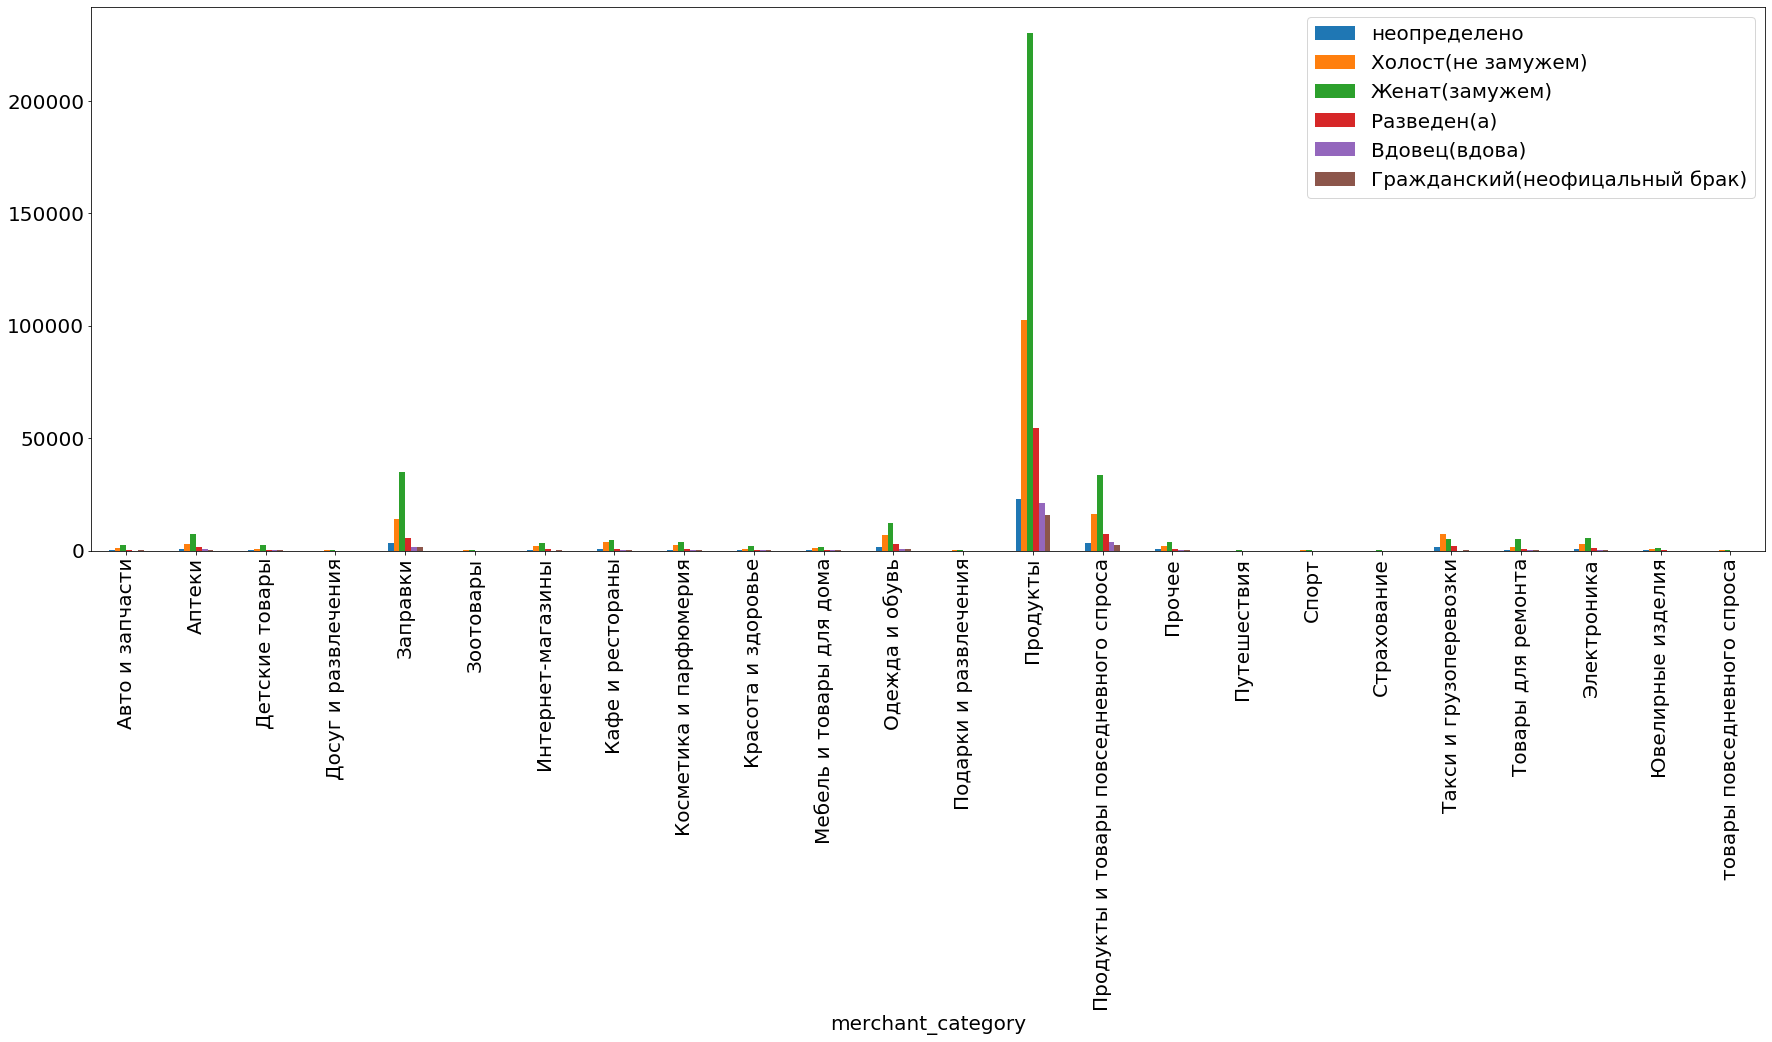

In [149]:
Marital_status_id.plot.bar(figsize=(30, 10))

plt.legend(['неопределено', 'Холост(не замужем)', 'Женат(замужем)', 'Разведен(а)', 'Вдовец(вдова)', 'Гражданский(неофицальный брак)'])

In [156]:
Employment_status_cd = pd.DataFrame()

for name, group in transactions_1.groupby(['employment_status_cd']):
    df_3 = group.groupby('merchant_category').count()
    Employment_status_cd[name] = df_3['client_id']

Employment_status_cd

,BUS,EME,EMR,OTH,PNS,PNW,UNK
merchant_category,,,,,,,
Авто и запчасти,104,2641,55.0,624,438,53.0,594
Аптеки,348,7131,25.0,1048,3146,597.0,1815
Детские товары,89,2509,13.0,482,362,60.0,599
Досуг и развлечения,15,331,1.0,82,18,5.0,109
Заправки,2926,35956,294.0,5842,5772,1833.0,8693
Зоотовары,7,191,NaN,25,38,2.0,96
Интернет-магазины,266,3850,18.0,916,444,96.0,1171
Кафе и рестораны,270,6244,41.0,1374,557,142.0,1786
Косметика и парфюмерия,169,4317,28.0,1110,996,225.0,1116


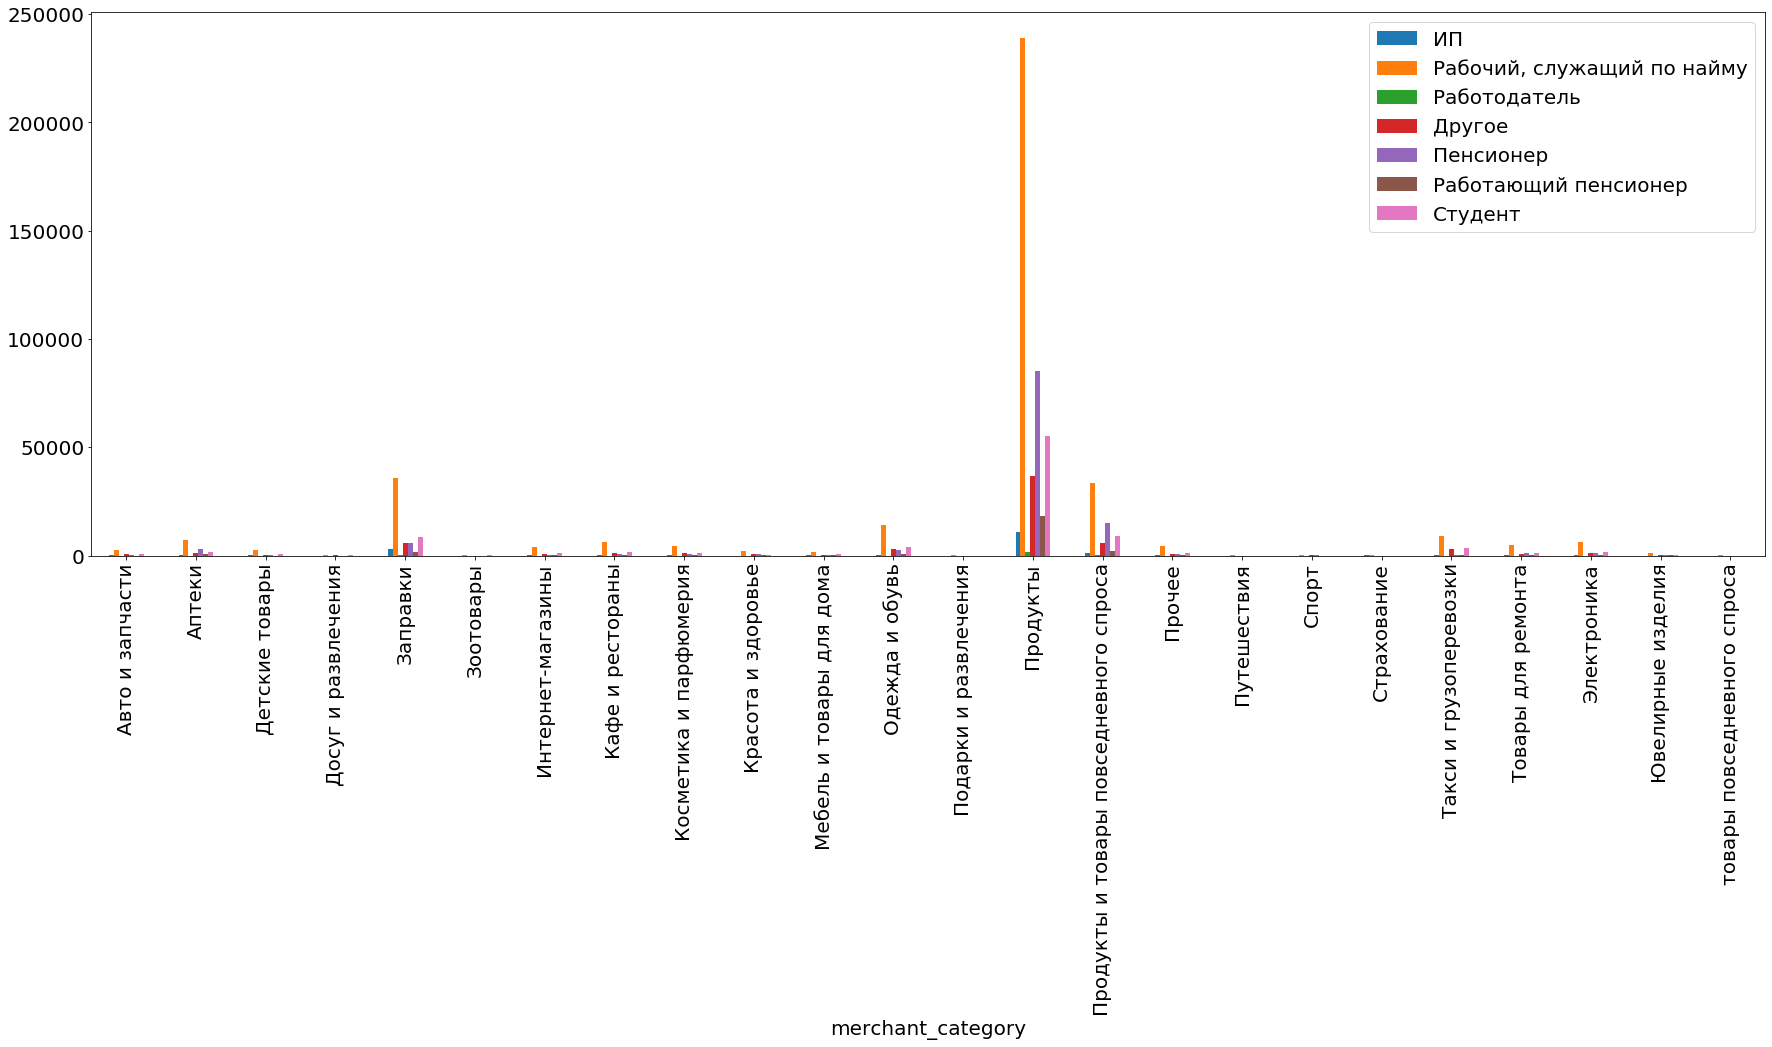

In [157]:
Employment_status_cd.plot.bar(figsize=(30, 10))

plt.legend(['ИП', 'Рабочий, служащий по найму', 'Работодатель', 'Другое', 'Пенсионер', 'Работающий пенсионер', 'Студент', 'Неопределено'])

In [158]:
Education_id = pd.DataFrame()

for name, group in transactions_1.groupby(['education_id']):
    df_4 = group.groupby('merchant_category').count()
    Education_id[name] = df_4['client_id']

Education_id

,-1,2,3,4,6,18
merchant_category,,,,,,
Авто и запчасти,1263,409,1228,135,1437,37.0
Аптеки,3261,1252,3968,341,5225,63.0
Детские товары,1137,235,909,110,1721,2.0
Досуг и развлечения,200,39,105,19,195,3.0
Заправки,15961,4794,17156,1862,21397,146.0
Зоотовары,129,19,81,1,129,NaN
Интернет-магазины,2165,314,1294,231,2755,2.0
Кафе и рестораны,3197,494,2144,661,3903,15.0
Косметика и парфюмерия,2366,706,2030,284,2538,37.0


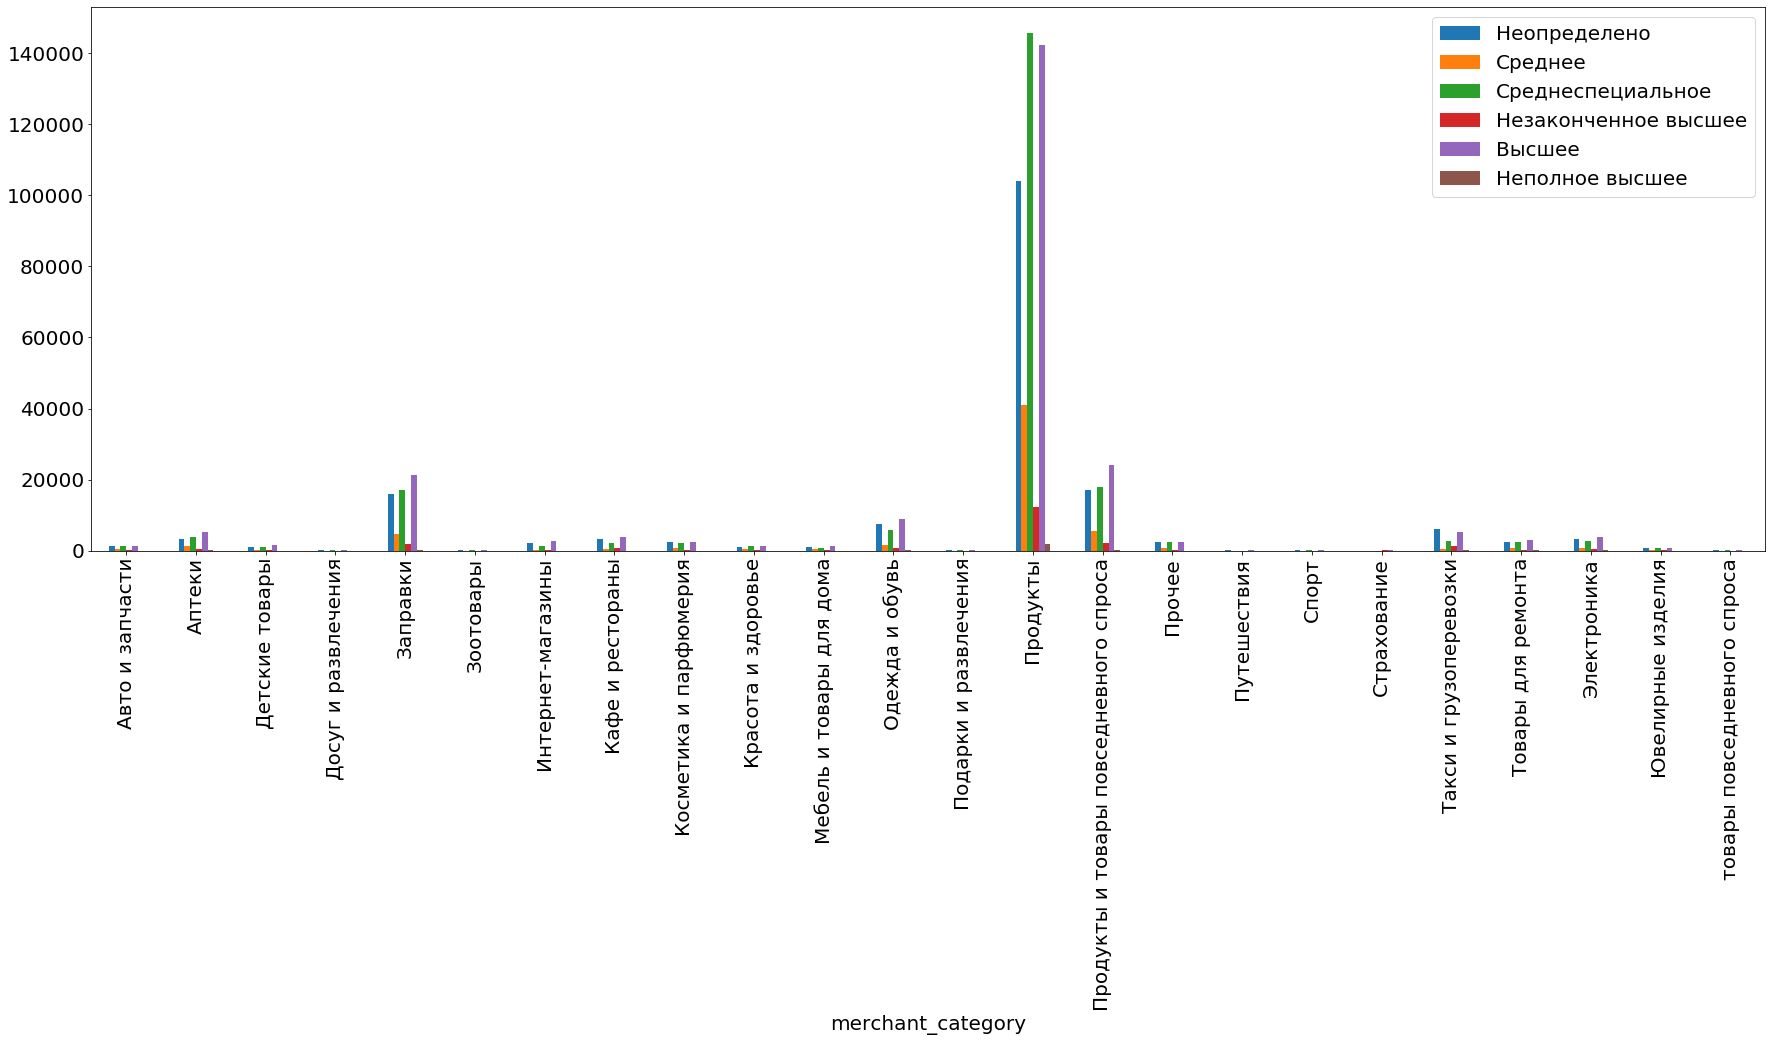

In [159]:
Education_id.plot.bar(figsize=(30, 10))

plt.legend(['Неопределено', 'Среднее', 'Среднеспециальное', 'Незаконченное высшее', 'Высшее', 'Неполное высшее'])

In [160]:
City_population_category = pd.DataFrame()

for name, group in transactions_1.groupby(['city_population_category']):
    df_5 = group.groupby('merchant_category').count()
    City_population_category[name] = df_5['client_id']

City_population_category

,0 – 100 тыс,100 – 300 тыс,300 – 700 тыс,>700 тыс
merchant_category,,,,
Авто и запчасти,1025,796,912,1630
Аптеки,4292,2864,2349,4477
Детские товары,1216,916,1043,842
Досуг и развлечения,67,46,104,337
Заправки,13979,10497,16115,20031
Зоотовары,64,133,65,85
Интернет-магазины,1042,1225,1707,2525
Кафе и рестораны,1573,2080,2202,4293
Косметика и парфюмерия,2481,1884,2517,1027


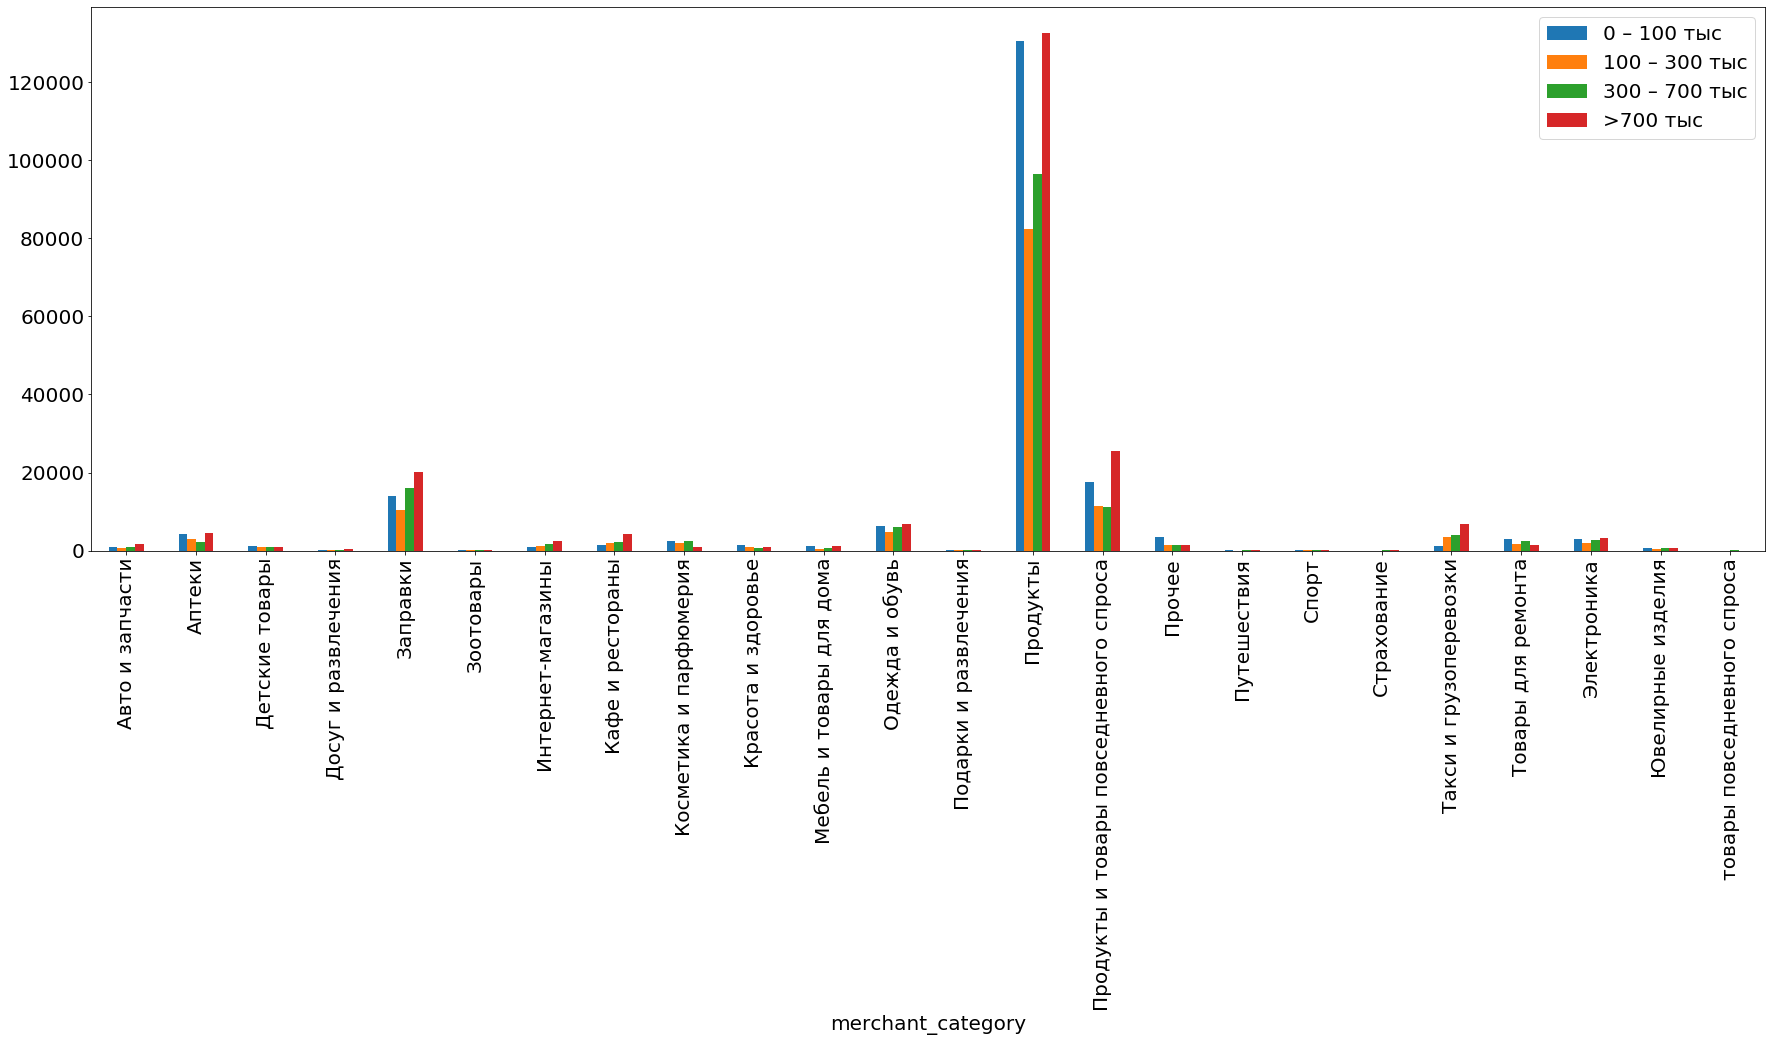

In [161]:
City_population_category.plot.bar(figsize=(30, 10))

In [ ]:
# Сгруппируем данные по "client_id" для нахождения общей суммы транзакций по карте и исследуем их.

In [167]:
Client_id_sum_total = transactions_1.groupby(["client_id"]).sum()

Client_id_sum_total['tran_amt']

client_id
1191         10684.90
1553         17666.28
4669          9285.48
6055          1878.12
9683        141184.23
              ...    
74837646     43910.16
74837901     22889.98
74838039     30215.43
74838061     55925.55
74838128     44912.88
Name: tran_amt, Length: 13268, dtype: float64

In [171]:
def my_basic_research(df=Client_id_sum_total, column = "tran_amt"):
    print("Базовые метрики")
    print(df[column].describe())
    print("------------------------------------")
    
    print("Самые популярные значения метрики, топ 5")
    print(df[column].value_counts().nlargest(5))
    print("------------------------------------")
    
    print("Эксцесс ", kurtosis(df[column]))
    print("Ассиметрия ", skew(df[column]))
    
    sns.distplot(df[column])
    plt.title("Распределение метрики")

Базовые метрики
count     13268.000000
mean      45327.733078
std       39977.699913
min          20.000000
25%       20513.637500
50%       35369.140000
75%       58659.905000
max      706411.000000
Name: tran_amt, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
3816.0    2
880.0     2
2200.0    2
944.0     2
360.0     2
Name: tran_amt, dtype: int64
------------------------------------
Эксцесс  23.803667590909964
Ассиметрия  3.3056621499250483


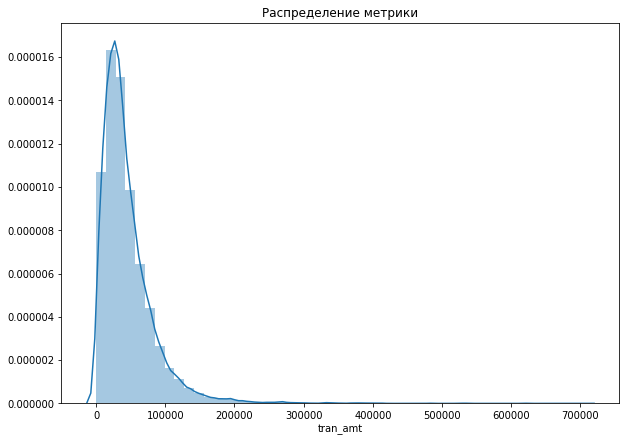

In [173]:
plt.rcParams.update({'font.size': 10})
my_basic_research(column = "tran_amt")

In [176]:
# 99 квантиль для выявления аномалий, которые дополнительно можно исследовать и сделать выводы о том, какой профиль клиентов расходующих наибольшее кол-во средств по карте

level_99 = np.percentile(Client_id_sum_total['tran_amt'], 99)

level_99

193485.77800000002

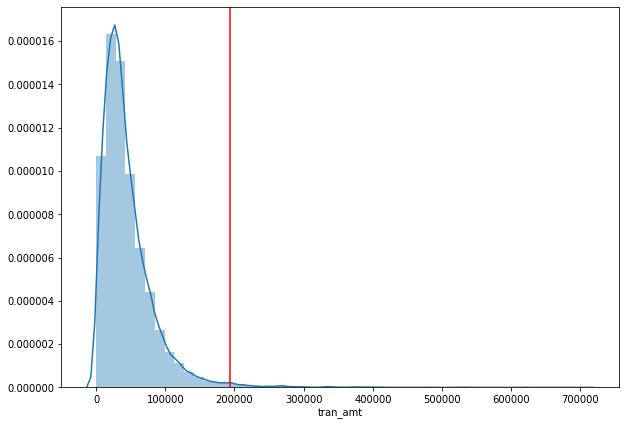

In [183]:
sns.distplot(Client_id_sum_total['tran_amt'])

plt.axvline(x = level_99, color = 'r', linestyle = '-')

In [187]:
Client_id_sum_total_anomaly = Client_id_sum_total[Client_id_sum_total["tran_amt"] >= level_99]

Client_id_sum_total_anomaly = pd.DataFrame(Client_id_sum_total_anomaly["tran_amt"]).merge(client, left_on=Client_id_sum_total_anomaly.index, right_on='client_id')

Client_id_sum_total_anomaly

,tran_amt,client_id,credit_limit_initial,credit_limit,add_product,mp_first_login,mp_last_login,tp_num,cl_age,education_id,gender_id,marital_status_id,employment_status_cd,city_population_category,app_channel
0,287131.15,654905,15000.0,15000.0,Халва,2018-04-04 00:00:00.000,2019-03-06 00:00:00.000,NaN,46,-1,2,2,UNK,300 – 700 тыс,Call Center
1,255612.98,2102819,30000.0,30000.0,Халва + ДК,2018-05-27 00:00:00.000,2019-03-11 00:00:00.000,NaN,33,6,2,1,EME,100 – 300 тыс,Walk In Sales
2,212814.00,2772866,120000.0,120000.0,Халва,2018-05-21 00:00:00.000,2019-03-12 00:00:00.000,2.0,48,6,1,1,EME,100 – 300 тыс,Walk In Sales
3,217941.50,3166858,90000.0,90000.0,Халва + ДК,2018-04-12 00:00:00.000,2019-02-25 00:00:00.000,NaN,47,-1,1,-1,UNK,0 – 100 тыс,Walk In Sales
4,200356.59,3378987,30000.0,60000.0,Халва,2018-06-10 00:00:00.000,2019-03-10 00:00:00.000,NaN,43,6,1,3,EME,0 – 100 тыс,УРМ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,308206.30,73612476,15000.0,15000.0,Халва + Вклад,2018-05-24 00:00:00.000,2019-01-16 00:00:00.000,NaN,27,6,1,2,EME,>700 тыс,Walk In Sales
129,315584.15,73617118,15000.0,15000.0,Халва + Вклад,2018-05-25 00:00:00.000,2019-03-11 00:00:00.000,NaN,51,-1,2,2,UNK,300 – 700 тыс,Walk In Sales
130,209768.55,73747709,20000.0,20000.0,Халва,2018-05-25 00:00:00.000,2019-03-08 00:00:00.000,NaN,27,3,2,1,EME,0 – 100 тыс,Internet Sales
131,224016.92,73764345,60000.0,60000.0,Халва + Вклад,2018-05-26 00:00:00.000,2019-03-11 00:00:00.000,NaN,42,-1,1,-1,UNK,300 – 700 тыс,Walk In Sales


In [217]:
gender_id_anomaly = Client_id_sum_total_anomaly.groupby(["employment_status_cd"]).count()

gender_id_anomaly['tran_amt']

employment_status_cd
BUS     8
EME    74
EMR     1
OTH    19
PNS     4
PNW     2
UNK    25
Name: tran_amt, dtype: int64

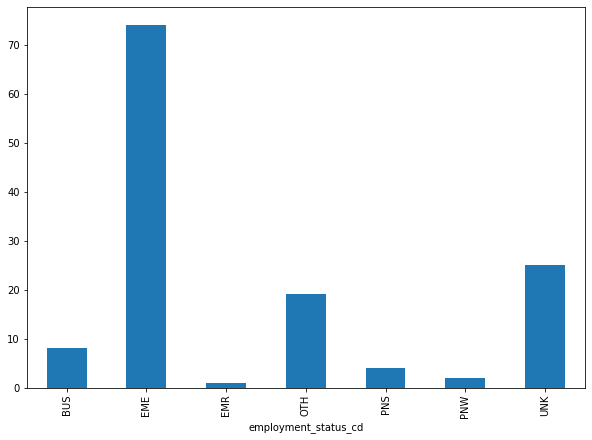

In [218]:
gender_id_anomaly['tran_amt'].plot.bar()

In [219]:
gender_id_anomaly = Client_id_sum_total_anomaly.groupby(["gender_id"]).count()

gender_id_anomaly['tran_amt']

gender_id
1    53
2    80
Name: tran_amt, dtype: int64

In [ ]:
# Проведем корреляционный анализ, какие характеристики наиболее сильно влияют на общее кол-во трат по карте

In [189]:
Client_id_sum_total_1 = pd.DataFrame(Client_id_sum_total["tran_amt"]).merge(client, left_on=Client_id_sum_total.index, right_on='client_id')

Client_id_sum_total_1

,tran_amt,client_id,credit_limit_initial,credit_limit,add_product,mp_first_login,mp_last_login,tp_num,cl_age,education_id,gender_id,marital_status_id,employment_status_cd,city_population_category,app_channel
0,10684.90,1191,30000.0,30000.0,Халва + ТК,2018-05-30 00:00:00.000,2019-03-03 00:00:00.000,NaN,48,3,2,5,EME,0 – 100 тыс,Call Center
1,17666.28,1553,15000.0,15000.0,Халва,2018-05-15 00:00:00.000,2019-02-15 00:00:00.000,NaN,58,2,1,1,PNW,0 – 100 тыс,Walk In Sales
2,9285.48,4669,15000.0,15000.0,Халва,NaN,NaN,NaN,66,3,2,2,PNS,300 – 700 тыс,Call Center
3,1878.12,6055,15000.0,15000.0,Халва + ДК,NaN,NaN,NaN,66,2,2,5,PNS,0 – 100 тыс,Walk In Sales
4,141184.23,9683,75000.0,75000.0,Халва,2018-05-23 00:00:00.000,2019-03-12 00:00:00.000,NaN,35,-1,2,1,OTH,100 – 300 тыс,DSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13263,43910.16,74837646,30000.0,30000.0,Халва,2018-06-01 00:00:00.000,2019-03-05 00:00:00.000,NaN,25,-1,1,1,OTH,100 – 300 тыс,Walk In Sales
13264,22889.98,74837901,30000.0,30000.0,Халва,2018-06-01 00:00:00.000,2019-03-11 00:00:00.000,NaN,45,6,1,2,EME,>700 тыс,Internet Sales
13265,30215.43,74838039,75000.0,75000.0,Халва,2018-06-01 00:00:00.000,2019-03-11 00:00:00.000,NaN,34,-1,1,1,OTH,300 – 700 тыс,DSA
13266,55925.55,74838061,75000.0,75000.0,Халва,2018-06-05 00:00:00.000,2019-03-10 00:00:00.000,NaN,57,6,1,3,EME,>700 тыс,Internet Sales


In [202]:
research_list = ["tran_amt", "cl_age", "education_id", "gender_id", "marital_status_id"]

In [203]:
corr_m = Client_id_sum_total_1[research_list].corr()

pd.DataFrame(corr_m['tran_amt'])

,tran_amt
tran_amt,1.000000
cl_age,-0.204132
education_id,-0.036017
gender_id,0.076860
marital_status_id,-0.092448


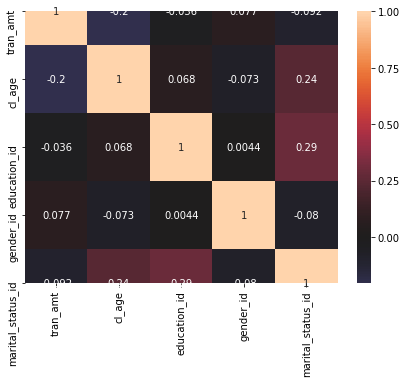

In [204]:
# Создадим тепловую карту

plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(7,5))
sns.heatmap(corr_m, center=0, annot=True)

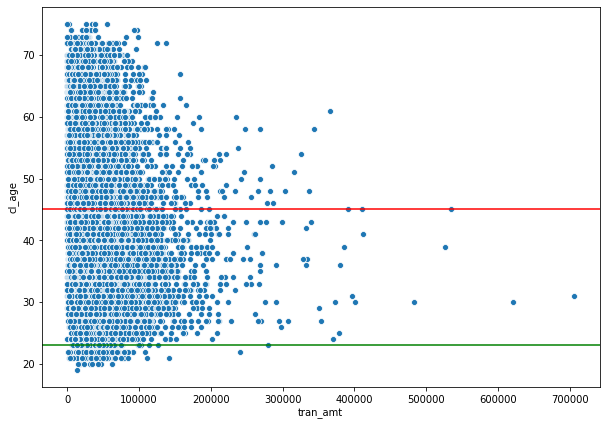

In [209]:
# Наиболее сильное влияние, по сравнению с остальными, оказывает возраст.
sns.scatterplot(x="tran_amt", y="cl_age", data=Client_id_sum_total_1)
plt.axhline(y=23, color="g", linestyle="-")
plt.axhline(y=45, color="r", linestyle="-")

In [ ]:
# Простеньникий алгоритм предсказания расходов за шесть месяцев, в зависимости от возраста и семейного положения на основе регрессии

In [273]:
from sklearn.linear_model import LinearRegression

X = Client_id_sum_total_1[["cl_age", "marital_status_id"]]
y = Client_id_sum_total_1['tran_amt']

In [274]:
reg = LinearRegression().fit(X, y)

In [284]:
X_1 = X[13265:13266]

X_1

,cl_age,marital_status_id
13265,34,1


In [285]:
reg.predict(X_1)[0]

52776.74508213854